# Example Solutions for E3

This notebook contains example solutions to <a href="E3 - Exercises on the Cell Membrane.ipynb">E3 - Exercises on the Cell Membrane</a>. 

Quicklinks
* [Exercise 1: A simple voltage clamp model](#1)
* [Exercise 2: Calculating Nernst Potentials](#2)
* [Exercise 3: The Equilibrium Membrane Potential](#3)
* [Exercise 4: A super simple action potential model](#4)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

<a id="1"></a>
### Exercise 1: A simple voltage clamp model

In this first exercise, we will explore how the cell behaves as a capacitor. We now look at the cell as only the impermeable membrane, with no ion channels. We then look at an experimental setup where we insert a small pipette through the membrane, into the cell. With this probe we can measure the membrane potential using a voltmeter.

We will now look at how this pipette can be used to implement a *voltage clamp*. A voltage clamp is a useful experimental setup used to control the membrane potential. If our voltmeter measures a membrane potential different to our desired target potential, a bit of applied current is injected through the pipette, changing the membrane potential as a result.

We can think of the situation as this electric circuit:

<img src="fig/voltage_clamp_circuit.png" width=250>

#### The differential equations

We know that the electric potential over the two components must be the same, and this is the membrane potential $V$. We want to find this potential as a function of time $V(t)$. Ideally, it should follow our prescribed, $V_{\rm target}(t)$, which can be constant in time, or whatever time-dependent function we want.

Our pipette acts as an Ohmic current source, with a magnitude given by
$$I_{\rm applied} = \frac{V - V_{\rm target}}{Rs}.$$
Note that this current is larger if the membrane potential is far from its target, and dies out once the potential approaches its target value.

Any current across the pipette will lead to a similar capacitive current across the membrane, which will change the charge built up across the membrane. So we have
$$C_{\rm m} \frac{{\rm d}V}{{\rm d}t} = I_{\rm cap} = -I_{\rm applied}.$$
Giving an ODE for the membrane potential
$$\frac{{\rm d}V}{{\rm d}t} = \frac{V_{\rm target}(t) - V}{C_{\rm m} R_{\rm s}}.$$

If you are not too used to analyzing electrical circuits and you found this hard to follow, the most important thing is we found an ODE for how the membrane potential changes over time, which you will now solve.

<a id="1"></a>
### Exercise 1: A simple voltage clamp model

We can think of the situation as this electric circuit:

<img src="fig/voltage_clamp_circuit.png" width=250>

#### The differential equations

The ODE to be solved is 
\begin{align}
I_{\rm applied} = \frac{V - V_{\rm target}}{Rs}, \\[0.5cm]
C_{\rm m} \frac{{\rm d}V}{{\rm d}t} = I_{\rm cap} = -I_{\rm applied}, \\[0.5cm]
\frac{{\rm d}V}{{\rm d}t} = \frac{V_{\rm target}(t) - V}{C_{\rm m} R_{\rm s}}.
\end{align}


**Exercise 1a)**

Let the prescribed membrane potential be the following step function
$$V_{\rm target}(t) = \begin{cases}
-40 {\rm\ mV} & \mbox{if } 2 {\rm\ ms} < t < 6 {\rm\ ms}, \\
-80 {\rm\ mV}& \mbox{else.}
\end{cases}$$
Implement this as a function `V_target(t)` and plot it in the period $t\in[0, 10]$ ms.

*Hint:* Rather than use `if`-tests, you could use boolean math: `x*(t > 2)*(t < 6)`, which lets your function take in both a scalar `t`, but also a full time array in the form of a numpy array.

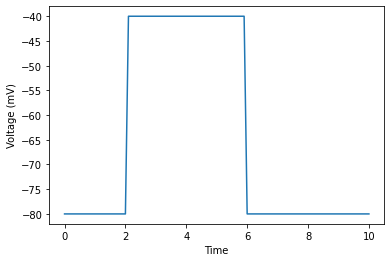

In [2]:
def V_target(t):
    return -80 + 40*(t > 2)*(t < 6)

t = np.linspace(0, 10, 101)

plt.plot(t, V_target(t))
plt.xlabel('Time')
plt.ylabel('Voltage (mV)')
plt.show()

**Exercise 1b)**

We will let $V$ be denoted in millivolts and time in milliseconds. Let $C_{\rm m} = 0.05$ nF and $R_{\rm s} = 10$ M$\Omega$. Look at the ODE and make sure the units are consistent by hand. Make any necessary changes to units. For reference, the ODE we aim to solve is 
$$\frac{{\rm d}V}{{\rm d}t} = \frac{V_{\rm target} - V}{C_{\rm m} R_{\rm s}}.$$

#### Example Solution

We start by looking at the denominator, as we are computing $V_{\rm target} - V$ these must be the same units, and we want to use millivolts here, mV. 

For the numerator we compute the product of $C_{\rm m}$, which is in nF, and $R_{\rm s}$, which is in M$\Omega$, then the product $C_{\rm m}R_{\rm s}$ will be millisecond, ms. If you think these unit computations are tricky, you can for example use Wolfram Alpha to double check.

The RHS is now mV over ms, and if we let our time also be given in milliseconds, this is consistent with our choice of measuring the membrane potential in mV.

**Exercise 1c)**

Now, implement the RHS of the ODE-system and use `odeint` to solve it to find the membrane potential $V(t)$ in the period $t \in [0, 10]$ ms. Let the parameters and units be as given in (1b) and the initial condition be $V_0 = -80$ mV.

Plot your solution.

In [3]:
def rhs(t, V, Cm, Rs):
    dV_dt = (V_target(t) - V)/(Cm*Rs)
    return dV_dt

In [4]:
# Define time array
time = (0, 10)

# Define parameters
Cm = 0.05 # nF
Rs = 10 # MOhm
params = (Cm, Rs)

# Define initial condition
y0 = (-80,)

# Call odeint
solution = solve_ivp(rhs, time, y0, args=params, max_step=0.1)

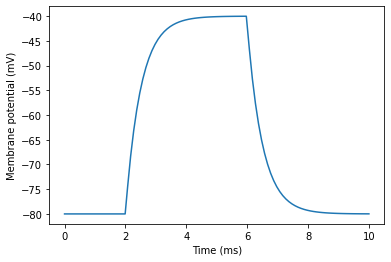

In [5]:
# Plot Solution
t = solution.t
V = solution.y[0]

plt.plot(t, V)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.show()

**Exercise 1d)**

Compare your solution of $V(t)$ to your plot of the prescribed $V_{\rm target}(t)$. Describe the differences. 

To make comparison easier, it might be a nice idea to plot the two over each other in the same figure.

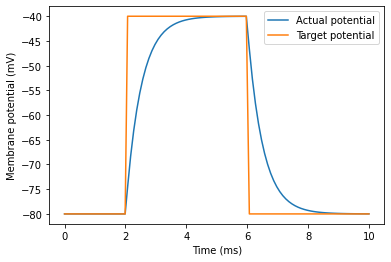

In [6]:
plt.plot(t, V, label='Actual potential')
plt.plot(t, V_target(t), label='Target potential')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.legend()
plt.show()

**Explanation:** We see that the membrane potential $V$ does follow the target potential, but with a substantial delay. While the target is a step change, i.e., instantaneous change, the membrane potential needs time to copy this change.

**(Optional) Exercise 1e)**

We will solve the following ODE analytically
$$\frac{{\rm d}V}{{\rm d}t} = \frac{V_{\rm target} - V}{C_{\rm m} R_{\rm s}}.$$
If we redefine $u = V_{\rm target} - V$, we see that the ODE is separabel:
$$-\frac{{\rm d}u}{{\rm d}t} = \frac{u}{C_{\rm m} R_{\rm s}}.$$
So we flip it around to be
$$- \frac{1}{u} {\rm\ d}u = \frac{1}{C_{\rm m} R_{\rm s}} {\rm\ d}t.$$
Integrating gives
$$\ln u = -\frac{t}{C_{\rm m} R_{\rm s}} + C.$$
or
$$u = Ae^{-t/(C_{\rm m}\cdot R_{\rm s})}.$$
Now we insert for $u$ so we get
$$V(t) = V_{\rm target} - Ae^{-t/(C_{\rm m}\cdot R_{\rm s})}.$$
We know that $V(0) = V_0$ so we get
$$V(t) = V_{\rm target} - (V_{\rm target} - V_0)e^{-t/(C_{\rm m}\cdot R_{\rm s})}.$$
This means the function is an exponential decay towards the target value, with a time constant of $\tau = C_{\rm m}\cdot R_{\rm s}.$


**Exercise 1f)**

Run the interactive widget below, and see how the membrane potential response changes as you change the membrane capacitance $C_{\rm m}$ and the series resistance $R_{\rm s}$. (You might need to run the cell twice for it to work).

If you want the membrane potential to follow the prescribed voltage as closely as possible, what restrictions does this put on $C_{\rm m}$ and $R_{\rm s}$?

In [7]:
import importlib
from L3_widgets import VoltageClampWidget
import L3_widgets
importlib.reload(L3_widgets)

L3_widgets.VoltageClampWidget().display()

interactive(children=(FloatSlider(value=0.05, description='Cm', max=0.1, min=0.005, step=0.005), IntSlider(val…

#### Discussion on Exercise 1

As you have probably seen through playing with the widget, for the voltage to follow the prescribed voltage, we want both the membrane capacitance and the series resistance to be small. In fact, it is the product of the two that is important, as this is the characteristic time constant of the membrane response:
$$\tau = C_{\rm m}\cdot R_{\rm s}.$$ 
If you solved (1e) you might have noticed this already. Simply put, the model says that the actual membrane potential will approach the prescribed potential as an exponential relaxation, with a relaxation time of $\tau$. If $\tau$ is big, we will need to wait a long time for it to reach the prescribed value.

For a whole cell voltage clamp protocol, the cell membrane capacitance is typically 0.05 nF, and the series resistance is usually in the range 5-20 M$\Omega$. This gives a noticeable delay in the membrane potential response, and capacitive currents that persist over several milliseconds. This can actually disturb the measurement of other currents, introducing noise.

In another technique, the 'patch' clamp, a small patch of the membrane is torn of (1 µm$^2$). This means the capacitance, $C_{\rm m}$ is drastically lowered ($\sim0.01$ pF). In a patch clamp, the series resistance is usually in the G$\Omega$ range, so the time constant becomes very small, and there are usually little noise due to the capacitive currents.

<a id="2"></a>
### Exercise 2: Calculating Nernst Potentials

The following table gives typical values for mammalian cardiomyocytes, and is taken from [Katz, 2010]

| Ion        | Intracellular | Extracellular  |
| -----------|:-------------:| -----:|
| Sodium     | 8 mM          | 110 mM |
| Potassium  | 100 mM        | 4 mM  |
| Calcium    | 0.2 µM        | 1 mM  |

You will also need to know these physical constants

| Name | Symbol  | Value | Unit |
| -----------|:-------------:|-----:|------:|
| Faraday's constant  | $F$ | 96485 | C/mol |
| Gas Constant | $R$ |  8.314 | J/(mol K) |
| Temperature | $T$ | 310|  K | 





**Exercise 2a)**

Based on the tabulated values, calculate the Nernst potentials for the three ionic species.

$$E_{\rm X} = \frac{RT}{zF}\ln \frac{[{\rm X}]_{\rm e}}{[{\rm X}]_{\rm i}}.$$

Print out the potentials in units of millivolts.

In [8]:
F = 96485 # C/mol
R = 8.314 # J/(mol K)
T = 310   # K

E_Na = R*T/F * np.log(110/8)
E_K = R*T/F * np.log(4/100)
E_Ca = R*T/(2*F) * np.log(1/0.0002)

E_Na *= 1e3
E_K *= 1e3
E_Ca *= 1e3

print(f"Equilibrium potential for Na: {E_Na:5.1f} mV")
print(f"Equilibrium potential for K:  {E_K:5.1f} mV")
print(f"Equilibrium potential for Ca: {E_Ca:5.1f} mV")

Equilibrium potential for Na:  70.0 mV
Equilibrium potential for K:  -86.0 mV
Equilibrium potential for Ca: 113.8 mV



**Exercise 2b)**


Looking at the concentrations of the three ions. We see that there is a large inward concentration gradient for sodium and calcium, which is why their Nernst potentials are positive, because a higher potential inside than outside will balance out the inward concentration gradient. For potassium however, the concentration gradient is the other direction, so we need to have a potential difference in the other direction to balance this gradient, which is why we get a negative potential in that case.

**Exercise 2c)**

We will use the equation
$$\Delta Q = C_m \Delta V$$
to approximate the amount of charge that passes through the membrane when we go from $V=-80$ mV to $V=+40$ mV.

In [9]:
Cm = 0.05 # nF
dV = 120 # mV
dQ = Cm*dV

print(f"Approximately {dQ:.1f} pC travels through the membrane.")

Approximately 6.0 pC travels through the membrane.


**Exercise 2d)**

We now find the number of ions $6.0$ pC corresponds to. Using Faraday's constant, we find

In [10]:
F = 96485 # C/mol
dNa = dQ/F
print(f"Roughly {dNa:.1g} picomols pass through the membrane.")

Roughly 6e-05 picomols pass through the membrane.


**Exercise 2e)**

Assuming the cell has a total volume of 20 picoliters, how much does the sodium concentration change as a result of this?


In [11]:
V = 20 # picoliters
dconc = dNa/V*1e3
rel = 1 - (8-dconc)/8 # Relative change in intracellular sodium

print(f"Absolute concentration change: {dconc:.4f} mM")
print(f"Relative concentration change: {rel:.3%}")

Absolute concentration change: 0.0031 mM
Relative concentration change: 0.039%


**Exercise 2f)**

In (2a) you found the Nernst potential for sodium for a cell under normal physiological conditions. Assume now that the intracellular sodium concentration of the cell has increased by 30%. How much does its Nernst potential change?

In [12]:
E_Na = R*T/F * np.log(110/8)
E_Na *= 1e3
print(f"Original E_Na:              {E_Na:.1f} mV")

E_Na = R*T/F * np.log(110/(1.3*8))
E_Na *= 1e3
print(f"After 30% increase in Na:   {E_Na:.1f} mV")

Original E_Na:              70.0 mV
After 30% increase in Na:   63.0 mV


**Exercise 2g)**

As is mentioned in the exercise discussion, the last two exercises show that (1) ion transport through the membrane changes concentrations very little, and (2) even large changes in concentration lead to little change in the Nernst potential. When combined, these two facts indicate that we can treat the Nernst potential as a constant. (With the exception of calcium).

#### Discussion on Exercise 2

These back of the envelope calculations have shown us that (1) the ion concentration of sodium changes little, even when there is a big change in membrane potential, and (2) even a big change in ion concentration will lead to a relatively small change in the Nernst potential. The last point can be understood because it is only the logarithm of the concentration ratio that enters into the equation for the Nernst potential.

The takeaway here is that while the Nernst potential is technically a variable that should change with changes in ion concentration ratio, in practice it will change so little that it can be considered a constant in a model. The one major exception to this is calcium, which has such a low initial intracellular concentration that the relative change can be as much as a thousandfold increase in concentration. We will get back to why the calcium concentration is so different from the other species later in the course.

<a id="3"></a>
### Exercise 3: The Equilibrium Membrane Potential

For a membrane only permeable to sodium, the membrane potential will be governed by the ODE

$$C_{\rm m}\frac{{\rm d}V}{{\rm d}t} = - g_{\rm Na} (V-E_{\rm Na}).$$

Where $C_{\rm m}$ is the membrane potential, and $g_{\rm Na}$ is the sodium conductance.

**Exercise 3a)**

We will solve the following ODE numerically
$$C_{\rm m}\frac{{\rm d}V}{{\rm d}t} = - g_{\rm Na} (V-E_{\rm Na}).$$

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [14]:
# Define the ODE
def rhs(t, V, Cm, g_Na, E_Na):
    dV_dt = -g_Na*(V - E_Na)/Cm
    return dV_dt

# Define the parameters and initial condition
T = (0, 100)
Cm = 0.05 # nF
g_Na = 0.005 # µS
params = (Cm, g_Na, E_Na)
y0 = (-80,) # mV

# Solve the ODE
solution = solve_ivp(rhs, T, y0, args=params, max_step=0.1)

t = solution.t
V, = solution.y

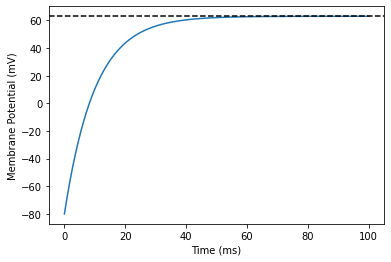

In [15]:
plt.plot(t, V)
plt.axhline(E_Na, linestyle='--', color='black')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.show()

**(Optional) Exercise 3b)**

We now solve the ODE analytically. It is almost identical to what we solved earlier, and we carry out the same process. First we substitute $u = V-E_{\rm Na}$ to find:
$$\frac{1}{u} \frac{{\rm d}u}{{\rm d}t} = -\frac{g_{\rm Na}}{C_{\rm m}}.$$
Which is a separabel ODE, so we get
$$u(t) = Ce^{-t\cdot g_{\rm Na}/C_{\rm m}}.$$
So we get
$$V(t) = E_{\rm Na} + (V_0 - E_{\rm Na})e^{-t/\tau},$$
where $\tau = g_{\rm Na}/C_{\rm m}$. So we see the solution is an exponential decay to the Nernst potential, with a time constant of $g_{\rm Na}/C_{\rm m}$. Thus, the bigger the conductance of the channels, the bigger the current, and the faster the change in potential, and the bigger the capacitance, the harder it is to change the membrane potential, so it takes longer.

**Exercise 3c)**

We see that it takes 25-50 ms for the membrane potential to reach equilibrium. 

The time constant we found analytically is
$$\tau = \frac{g_{\rm Na}}{C_{\rm m}} = \frac{0.005 {\rm\ µS}}{0.05 {\rm\ nF}} = 10 {\rm\ ms}.$$
Which seems to be right from the plot. At $t=\tau$, the solution should have reached 1/e'th from the equilibrium.

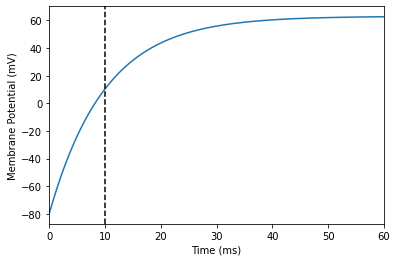

In [16]:
plt.plot(t, V)
plt.axvline(10, linestyle='--', color='black')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.xlim(0, 60)
plt.show()

**Exercise 3d)**

We copy our code from above, and add the two new currents

In [17]:
# Define the ODE
def rhs(t, V, Cm, g_Na, g_K, g_Ca, E_Na, E_K, E_Ca):
    dV_dt = -(g_Na*(V - E_Na) + g_K*(V - E_K) + g_Ca*(V - E_Ca))/Cm
    return dV_dt

# Define the parameters and initial condition
T = (0, 100)
Cm = 0.05 # nF
g_Na = 0.005 # µS
g_K = 0.05 # µS
g_Ca = 0.002 # µS
params = (Cm, g_Na, g_K, g_Ca, E_Na, E_K, E_Ca)
y0 = (0,) # mV

# Solve the ODE
solution = solve_ivp(rhs, T, y0, args=params, max_step=0.1)

t = solution.t
V, = solution.y

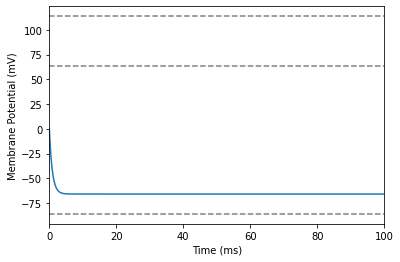

In [18]:
plt.plot(t, V)
plt.axhline(E_Na, linestyle='--', color='grey')
plt.axhline(E_Ca, linestyle='--', color='grey')
plt.axhline(E_K, linestyle='--', color='grey')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.xlim(0, 100)
plt.show()

**Exercise 3e)**

From the plot we can see that the equilibrium looks to be about -65 mV. If we want to write it out, we can read out the last value of the `V` variable, which is a numpy array, using negative indexing let's us read the last element:

In [19]:
print(f"Equilibrium potential: {float(V[-1]):.1f} mV")

Equilibrium potential: -65.9 mV


Rerunning with a different initial condition shows us that the equilibrium does not change.

The equilibrium potential becomes -65 mV in this case, because this is a balancing point between the three currents. Each current individually wants to membrane potential to be equal to their Nernst potential, so the sodium and calcium currents are pulling $V$ upwards, while the potassium current  is pulling it down. Because we have set the potassium current to be so much stronger $g_{\rm K} \gg g_{\rm Na} \approx g_{\rm Ca}$, we see that it wins this *"tug-of-war"* and the equilibrium lies close to the Nernst potential for potassium.


**Exercise 3f)**

Playing around with the widget we find that we must max out the potassium conductance ($g_{\rm K} = 25-30$ µS) and minimize the calcium and sodium conductances (for example $g_{\rm Na} =1$ µS and $g_{\rm Ca}=0$ µS), to end up at -80 mV.

This shouldn't be too surprising, as -80 mV is very close to the Nernst potential for potassium, meaning potassium should be dominating when the cell is resting. In practice we find that the potassium conductance at rest is indeed about 25-fold that of the combined sodium and calcium conductances.

<a id="4"></a>
### Exercise 4: A super simple action potential model

#### Exercise 4a)

We now solve the ODE
$$C_{\rm m}\frac{{\rm d}V}{{\rm d}t} = -g_{\rm Na} (V-E_{\rm Na}) - g_{\rm K} (V-E_{\rm K}).$$
With a time dependent sodium conductance:
$$g_{\rm Na}(t) = \begin{cases}
0.75 {\rm\ µS} & \mbox{if } 2 {\rm\ ms} < t < 2.2 {\rm\ ms}, \\
0.003 {\rm\ µS} & \mbox{else.}
\end{cases}$$

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [21]:
# Define the ODE
def rhs(t, V, Cm, g_K, E_Na, E_K):
    g_Na = 0.55 if (2 < t < 2.2) else 0.003
    dV_dt = (-g_Na*(V-E_Na) - g_K*(V-E_K))/Cm
    return dV_dt

# Define the parameters and initial condition
T = (0, 10)
Cm = 0.05 # nF
g_K = 0.075 # µS
params = (Cm, g_K, E_Na, E_K)
y0 = (-80,) # mV

# Solve the ODE
solution = solve_ivp(rhs, T, y0, args=params, max_step=0.1)

t = solution.t
V, = solution.y

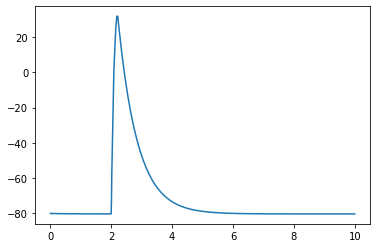

In [22]:
plt.plot(t, V)
plt.show()

#### Exercise 4b)


We see that before $t=2$ ms, the cell is resting with a membrane potential at around -80 mV. At $t=2$ ms, the sodium channels open and we see a very rapid increase in the membrane potential. This is because the balance between the inward sodium current and the outward potassium current has been dramatically shifted.

While the sodium current would like to approach the Nernst potential for sodium at around +70 mV, the membrane is not given enough time to do this. Instead, at $t=2.2$ ms, the channels close again. This means that the balance is again shifted to the stronger potassium current, and the membrane potential drops down to its resting membrane potential at around -80 mV.

The membrane potential is always driven by passive ion transport, i.e., electrodiffusion. The underlying driving force therefore never changes. The only changes over time is what channels are open, i.e., what ions are permitted to diffuse through the membrane.

#### Discussion

Here we have created a very simple model of an action potential, by saying that at some time sodium channels open and stay open for a short, fixed, duration. While this is a gross simplification of how sodium channels work, it is actually produces an action potential that is phenomenologically quite correct. At least for neuronal action potentials which last on the order of milliseconds. In cardiac cells, action potentials last for a few hundred milliseconds. You will understand why this is the case better when we get further in the course.